<a href="https://colab.research.google.com/github/maayaikeda/syllable_classifier/blob/main/Markov_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [3]:
# Set directory
%cd "/content/drive/My Drive"

/content/drive/My Drive


Go to this Github page ([Click here](https://github.com/NaysanSaran/markov-chain)) and download files by clicking the 'code' button on the right corner and selecting 'download zip'.

Then, upload files markovchain.py and node.py using the code below.

In [4]:
from google.colab import files

uploaded = files.upload()

In [5]:
!python3 "markovchain.py"

In [6]:
!python3 "node.py"

In [7]:
import markovchain
import node
from markovchain import MarkovChain

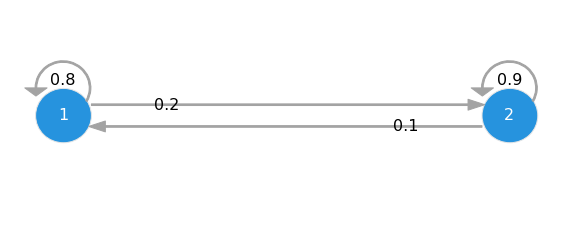

In [8]:
P = np.array([[0.8, 0.2], [0.1, 0.9]]) # Transition matrix
mc = markovchain.MarkovChain(P, ['1', '2'])
mc.draw("markov-chain-two-states.png")

I have uploaded my csv files in the "syllable_csvfiles" folder inside "Song" folder in my google drive.

In the code below, put your bird name. The following code will only read files from the bird you specified here.

In [62]:
bird = 'G505'

In [63]:
# get all files in this folder
filenames = glob.glob('Songs/syllable_csvfiles/'+bird+'*.csv')

In [64]:
filenames

['Songs/syllable_csvfiles/G505_43739.37589170_10_1_10_26_29.wav_syllables.csv',
 'Songs/syllable_csvfiles/G505_23739.37589170_10_1_10_26_29.wav_syllables.csv']

In [65]:
df = pd.read_csv(filenames[0])
columnnames = df.columns.tolist()

In [66]:
# Read files and concatinate
df1 = pd.DataFrame(columns = columnnames)
for file in filenames:
  df = pd.read_csv(file)
  df1 = pd.concat([df1, df], ignore_index=True)

In [67]:
df1.head()

,name,duration,sound,start,end,pred,percent,cum_percent
0,chunk_2,0.408980,True,810,1043,call,0.101250,0.116875
1,chunk_3,0.180000,True,1196,1264,call,0.149500,0.266375
2,chunk_4,0.093016,True,1335,1376,i,0.166875,0.433250
3,chunk_5,0.096984,True,1409,1450,i,0.176125,0.609375
4,chunk_7,0.057007,True,1537,1579,A,0.192125,0.992625


In [68]:
# Convert the syllable sequence column to list
sequence = df1.pred.tolist()

In [69]:
from itertools import islice

def window(seq, n=2):
    "Sliding window width n from seq.  From old itertools recipes."""
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [70]:

pairs = pd.DataFrame(window(sequence), columns=['state1', 'state2'])
counts = pairs.groupby('state1')['state2'].value_counts()
probs = (counts / counts.sum()).unstack()

In [71]:
# replacing nan with 0
probs = probs.fillna(0)
# only show two decimal places
probs.round(2)

state2,?,A,B,C,D,call,i
state1,,,,,,,
?,0.00,0.00,0.00,0.04,0.00,0.00,0.00
A,0.00,0.00,0.21,0.02,0.00,0.00,0.00
B,0.04,0.00,0.00,0.13,0.00,0.03,0.00
C,0.00,0.06,0.00,0.04,0.11,0.04,0.00
D,0.00,0.11,0.00,0.00,0.00,0.00,0.00
call,0.00,0.02,0.00,0.02,0.00,0.02,0.04
i,0.00,0.04,0.00,0.00,0.00,0.00,0.02


In [72]:
# Save a copy
probs_tosave = probs.round(2).copy()

The maximum number of nodes you can plot with this function is 4. So here, we are only plotting syllables A~D

In [73]:
columns_tokeep = ['A','B','C','D']

In [74]:
# A function to get the difference between two lists
def Diff(list1, list2): 
    return (list(list(set(list1)-set(list2)) + list(set(list2)-set(list1))))

In [75]:
# Get the difference between the current columns and the end column
diff = Diff(columns_tokeep, probs.columns.tolist())

In [76]:
# Drop rows we don't need
probs.drop(diff, inplace=True)
# Select columns to keep
probs = probs[columns_tokeep]


In [77]:
probs.round(2)

state2,A,B,C,D
state1,,,,
A,0.00,0.21,0.02,0.00
B,0.00,0.00,0.13,0.00
C,0.06,0.00,0.04,0.11
D,0.11,0.00,0.00,0.00


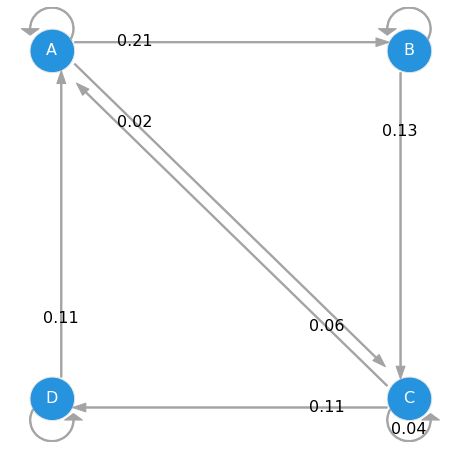

In [78]:
P = probs.round(2).values # Transition matrix # 2 decimal values
mc = markovchain.MarkovChain(P, probs.columns.tolist())
mc.draw("markov-chain-syllable.png")

In [80]:
# Save the original probability transition table to a csv file name birdname_transitionprobs.csv
probs_tosave.to_csv(bird+"_transitionprobs.csv",index=True)